<a href="https://colab.research.google.com/github/mwmikewise/Customer-Clustering/blob/main/Customer_Cluster_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Cluster Project**

Project: 

The marketing team has collected data on 2000 of our current customers. They have asked the data science team to create an algorithm that will group customers based on the data. This will help the marketing team create targeted ads and promotional offers.

Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [4]:
df = pd.read_csv("segmentation data.csv")
df = df.drop(columns = 'ID')

Notes: 
*   Dropped ID column (Didn't see value in keeping extra column as it was merely an identifier and not a feature that will help with clustering)

# Data Exploration

Data Overview

In [5]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


Notes:
*   Sex: 0=Male, 1=Female
*   Marital Status: 0=single, 1=not-single
*   Education: 0=Unknown, 1=High school, 2=University, 3=Graduate
*   Occupation: 0=Unemployed/No-skill, 1=Skilled, 2=Management
*   Settlement Size (City Size): 0=Small, 1=Medium, 2=Large

Identifying Variable Types

In [6]:
df.info()
df[['Age', 'Income']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


,Age,Income
count,2000.000000,2000.000000
mean,35.909000,120954.419000
std,11.719402,38108.824679
min,18.000000,35832.000000
25%,27.000000,97663.250000
50%,33.000000,115548.500000
75%,42.000000,138072.250000
max,76.000000,309364.000000


Notes:

*   7 Columns
*   2000 Rows
*  No missing values
*   All values are integers

In [7]:
print(df['Sex'].value_counts())
print(df['Marital status'].value_counts())
print(df['Occupation'].value_counts())
print(df['Education'].value_counts())

0    1086
1     914
Name: Sex, dtype: int64
0    1007
1     993
Name: Marital status, dtype: int64
1    1113
0     633
2     254
Name: Occupation, dtype: int64
1    1386
2     291
0     287
3      36
Name: Education, dtype: int64


Notes:
*   Slightly more men than women surveyed, but about the same in marrital status
*   Large difference in occupations surveyed
*   Very large difference in education levels surveyed

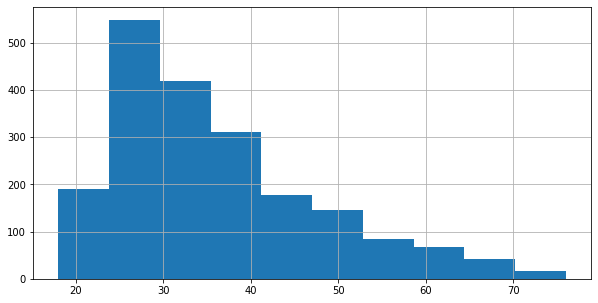

In [8]:
df.Age.hist(figsize=(10,5))

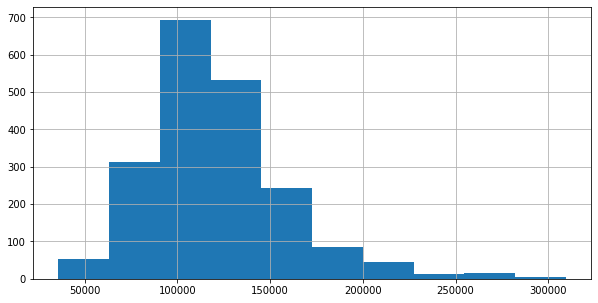

In [9]:
df.Income.hist(figsize=(10,5))

Notes:


*   Most customers 25-35 years old with a mean of about 36
*   Most income between about 90k - 140k with a mean of about 121,000
*   Both histograms have a right skew (seems to affect age, but not as great of an impact on income judging by the means and the range where most values lie)

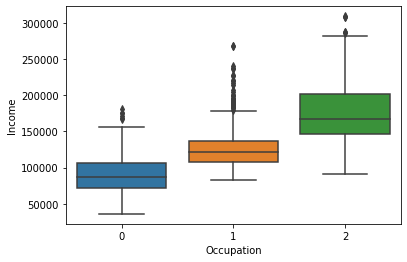

In [10]:
sns.boxplot(x = 'Occupation', y = 'Income', data = df)

Notes:


*   Trend makes sense
*   Higher level occupation means higher pay
*   Appears to be a few outliers for no skill/management occupation
*   Several outliers for skilled occupation
*   All outliers on higher end only



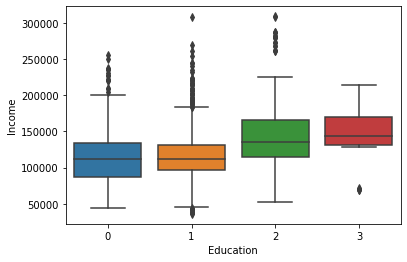

In [11]:
sns.boxplot(x = 'Education', y = 'Income', data = df)

Notes: 


*   The higher education level seems odd
*   Usually higher education means higher pay but in this case it seems there is little difference in the means of university vs graduate.
*   Graduate has outliers only in the lower side, not very many outliers though so possibly didn't get a job in their field of study, or are older in age and not in field anymore, with a lower paying job
*   All other education levels have several outliers on the higher side, where several make more than a graduate degree





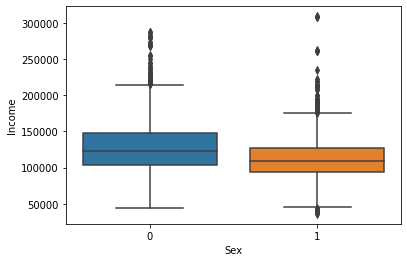

In [12]:
sns.boxplot(x = 'Sex', y = 'Income', data = df)

Notes:
*   Women seem to make less than men on average
*   Both groups have several outliers with women having some on both lower and higher side, while men only on the higher side
*   Min for men and women about the same
*   Men slightly higer in Q1 and median, but noticeably larger in Q3 and max

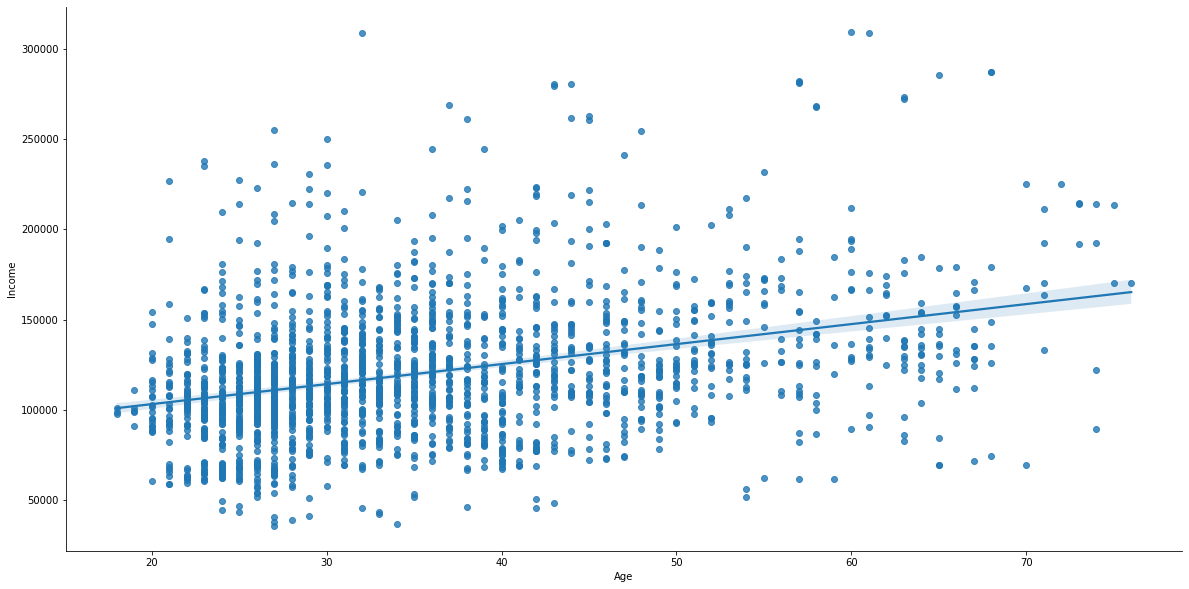

In [13]:
g = sns.regplot(x='Age',y='Income',data=df)
g.figure.set_size_inches(20, 10)
sns.despine()

<font color='red'>Maybe we should add something related to the lack of correlation. In addition, a heatmap would be a nice option here. Take a look [here](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec)</font> 


Notes:
*   Few possible outliers
*   Slight upward trend with age, but not very large
*   Between this graph and the heatmap below, seems to be little correlation between age and income, would have expected larger increase due to experience usually earning more (more age = more experience typically)



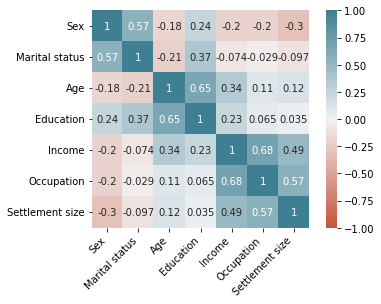

In [14]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, 
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Notes:
*   Highest Correlations (Highest to lowest):
1.   Income and occupation
2.   Age and education
3.   Occupation and settlement size
4.   Marital Staus and sex
5.   Income and settlement size
6.   Income and age

*   Lowest Correlations (Lowest to highest):
1.   Sex and settlement size
2.   Sex and occupation
3.   Sex and income
4.   Marrital status and age
5.   Sex and age
6.   Marrital status and settlement size

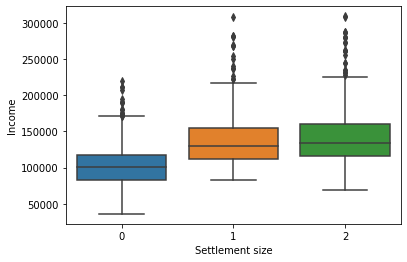

In [15]:
sns.boxplot(x = 'Settlement size', y = 'Income', data = df)

Notes: 


*   Income seems lower in small towns which makes sense 
*   Doesn't appear to be any difference in income between mid and large towns for income
*   All settlement sizes have several outliers on the high side
*   Large cities have a slightly larger range than mid size cities





# K-Means Clustering

Scaling Data Standard Scaler

In [16]:
df_kmeans = df.copy()
df_kmeans_mms = df.copy()
df_kmeans_rs = df.copy()

In [17]:
from sklearn.preprocessing import StandardScaler
df_ss_kmeans = StandardScaler().fit_transform(df_kmeans)
df_scaled = pd.DataFrame(df_ss_kmeans,columns = df_kmeans.columns)
df_scaled.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


Finding Best Number of Clusters for Standard Scaler fit

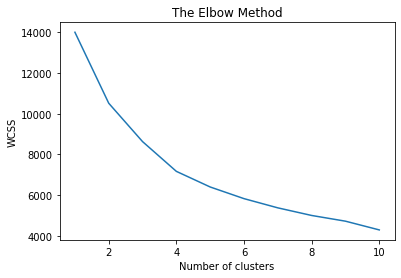

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Using SilhouetteVisulaizer to check best number of clusters

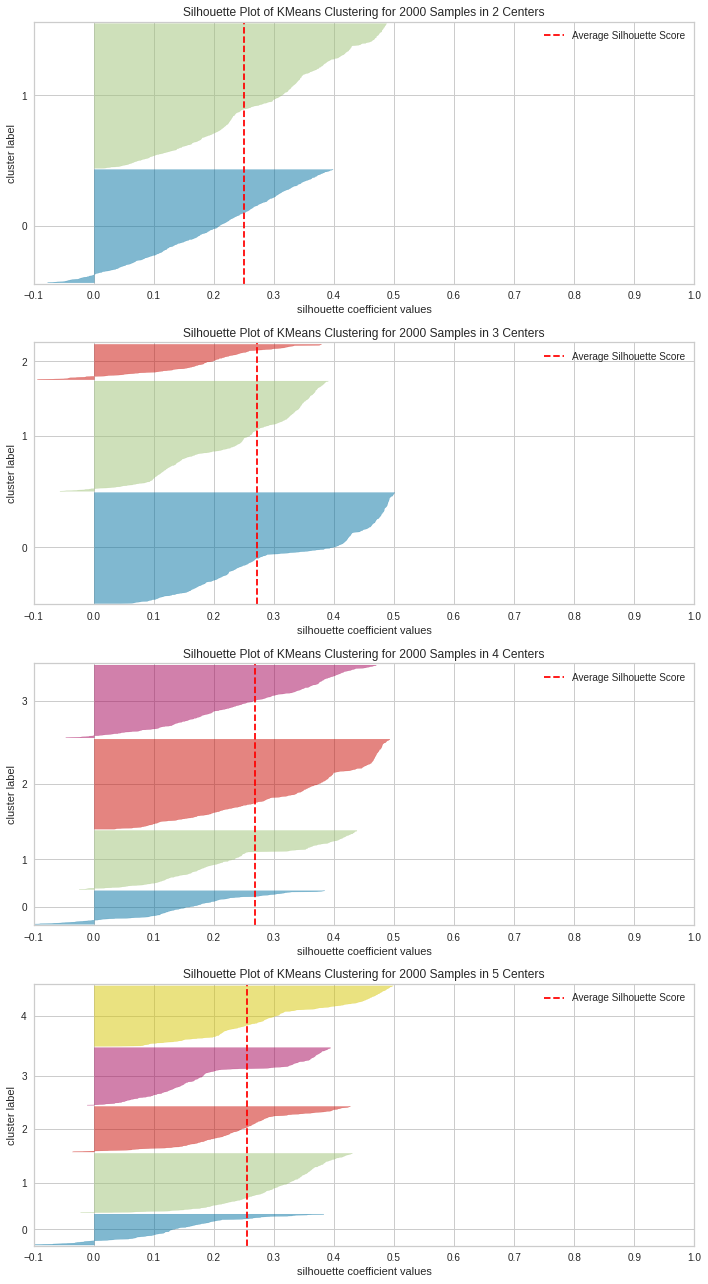

In [19]:
from yellowbrick.cluster import SilhouetteVisualizer

SELECTED_FEATURES = ['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size']

k_range = range(2, 6)
fig, axes = plt.subplots(4, 1, figsize=(10, 18))

for i in k_range:   
    model = KMeans(i, init='k-means++', n_init=100, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=axes[i-2])
    visualizer.fit(df_scaled[SELECTED_FEATURES])
    visualizer.finalize()
    axes[i-2].set_xlim(-0.1, 1)
    
plt.tight_layout()

Finding best number of clusters for MinMaxScaler

In [20]:
from sklearn.preprocessing import MinMaxScaler
df_mms_kmeans = MinMaxScaler().fit_transform(df_kmeans_mms)
df_scaled_mms = pd.DataFrame(df_mms_kmeans,columns = df_kmeans_mms.columns)

Elbow method

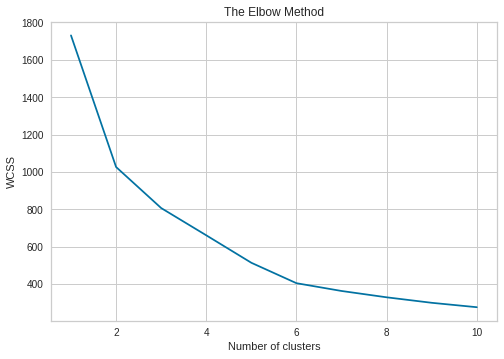

In [21]:
wcss1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled_mms)
    wcss1.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette Visulaizer method

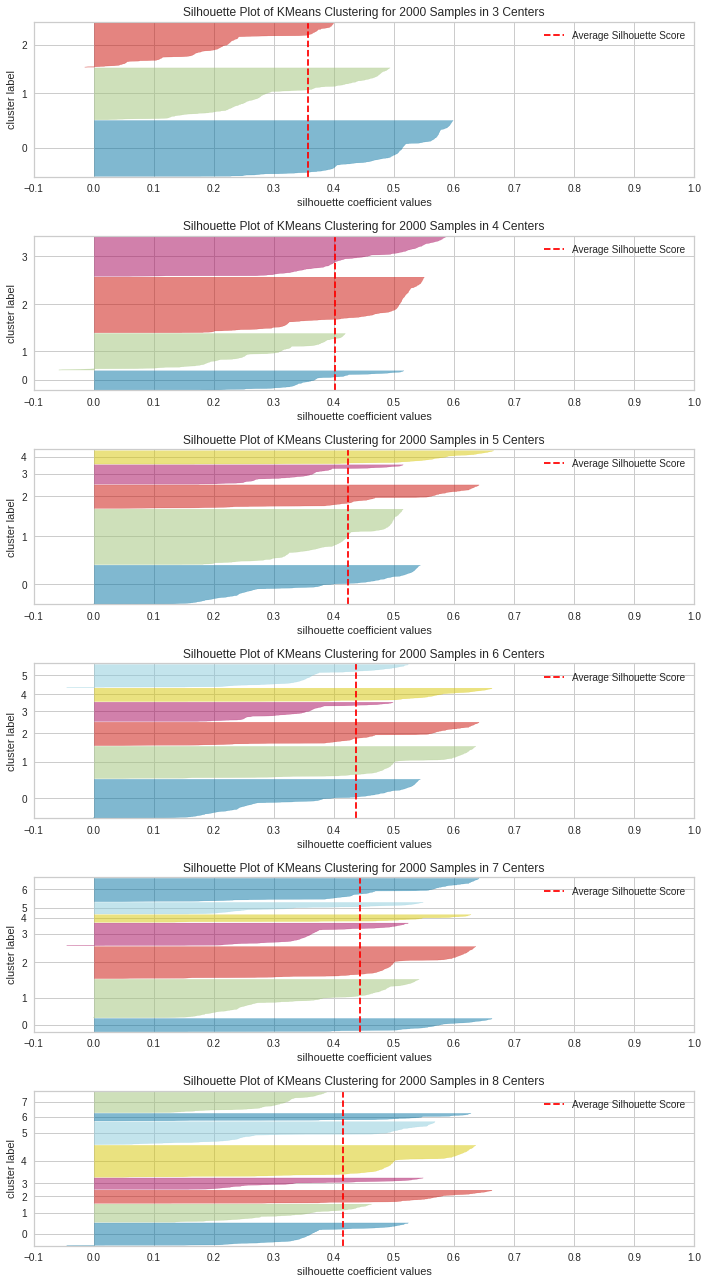

In [22]:
k_range = range(3, 9)
fig, axes = plt.subplots(6, 1, figsize=(10, 18))

for i in k_range:   
    model = KMeans(i, init='k-means++', n_init=100, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=axes[i-3])
    visualizer.fit(df_scaled_mms[SELECTED_FEATURES])
    visualizer.finalize()
    axes[i-3].set_xlim(-0.1, 1)
    
plt.tight_layout()

Scaling using RobustScaler

In [23]:
from sklearn.preprocessing import RobustScaler
df_rs_kmeans = RobustScaler().fit_transform(df_kmeans_rs)
df_scaled_rs = pd.DataFrame(df_rs_kmeans,columns = df_kmeans_rs.columns)

Finding best number of clusters for RobustScaler

Elbow Method

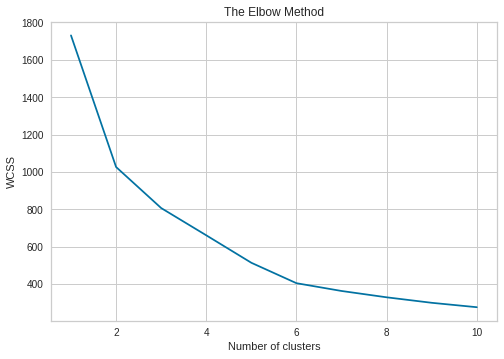

In [24]:
wcss2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled_rs)
    wcss2.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette Visulizer

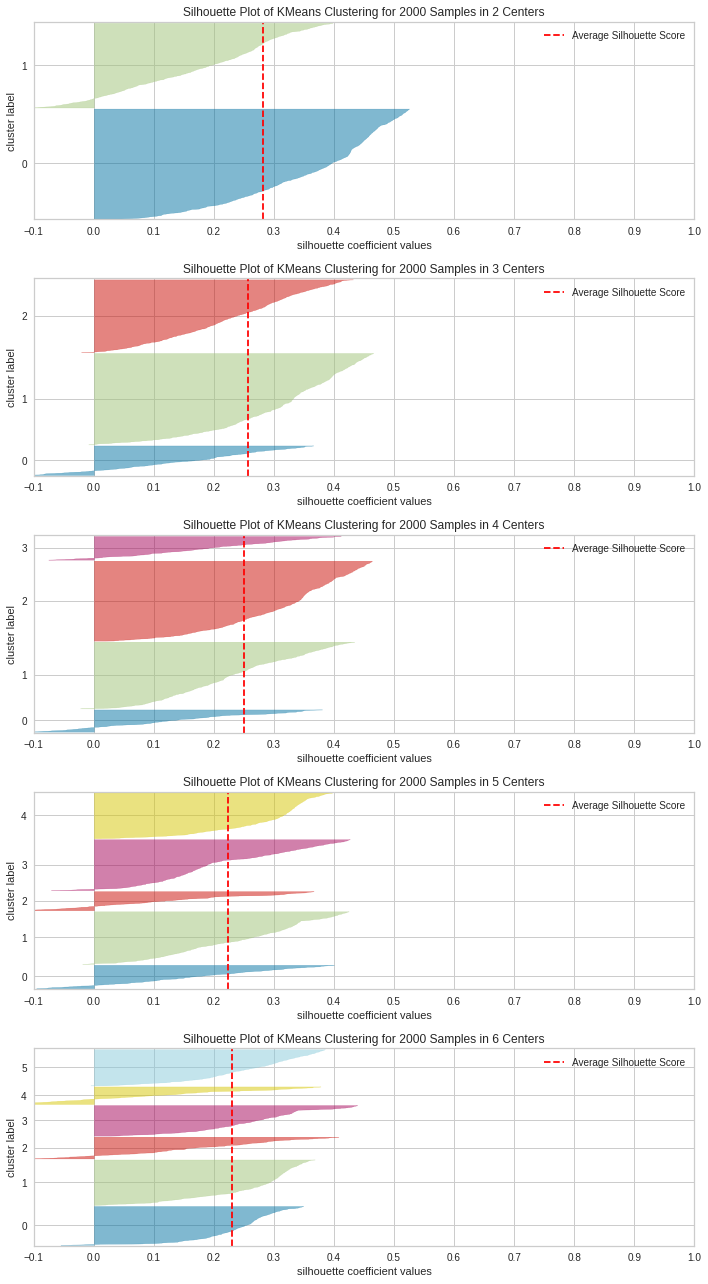

In [25]:
k_range = range(2, 7)
fig, axes = plt.subplots(5, 1, figsize=(10, 18))

for i in k_range:   
    model = KMeans(i, init='k-means++', n_init=100, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=axes[i-2])
    visualizer.fit(df_scaled_rs[SELECTED_FEATURES])
    visualizer.finalize()
    axes[i-2].set_xlim(-0.1, 1)
    
plt.tight_layout()

Note: Using elbows method should use 4 clusters with standard scaler. Using silhouette visulizer appears should use 3 clusters, but 4 clusters are really close in coefficient score. Will use 4 clusters

For MinMaxScaler, elbow method is hard to decide. Would use somewhere between 4 - 7 clusters. Using the silouette scores, 7 clusters would be best. Will use 7 clusters for MinMaxScaler

For RobustScaler, elbow method somewhere between 2-6. Using silhouette score, best score was with 2 clusters. Will use 2 clusters for RobustScaler

Applying K-Means and adding labels to df

Standard Scaler

In [26]:
kmeans_ss = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans_ss.fit_predict(df_ss_kmeans)
labels_k = kmeans_ss.labels_
df_kmeans["Cluster"] = labels_k
df_kmeans.head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,2
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,3
4,0,0,53,1,149031,1,1,3
5,0,0,35,1,144848,0,0,1
6,0,0,53,1,156495,1,1,3
7,0,0,35,1,193621,2,1,3
8,0,1,61,2,151591,0,0,0
9,0,1,28,1,174646,2,0,3


Scatter plot of age vs income for k-means clustering with Standard Scaler




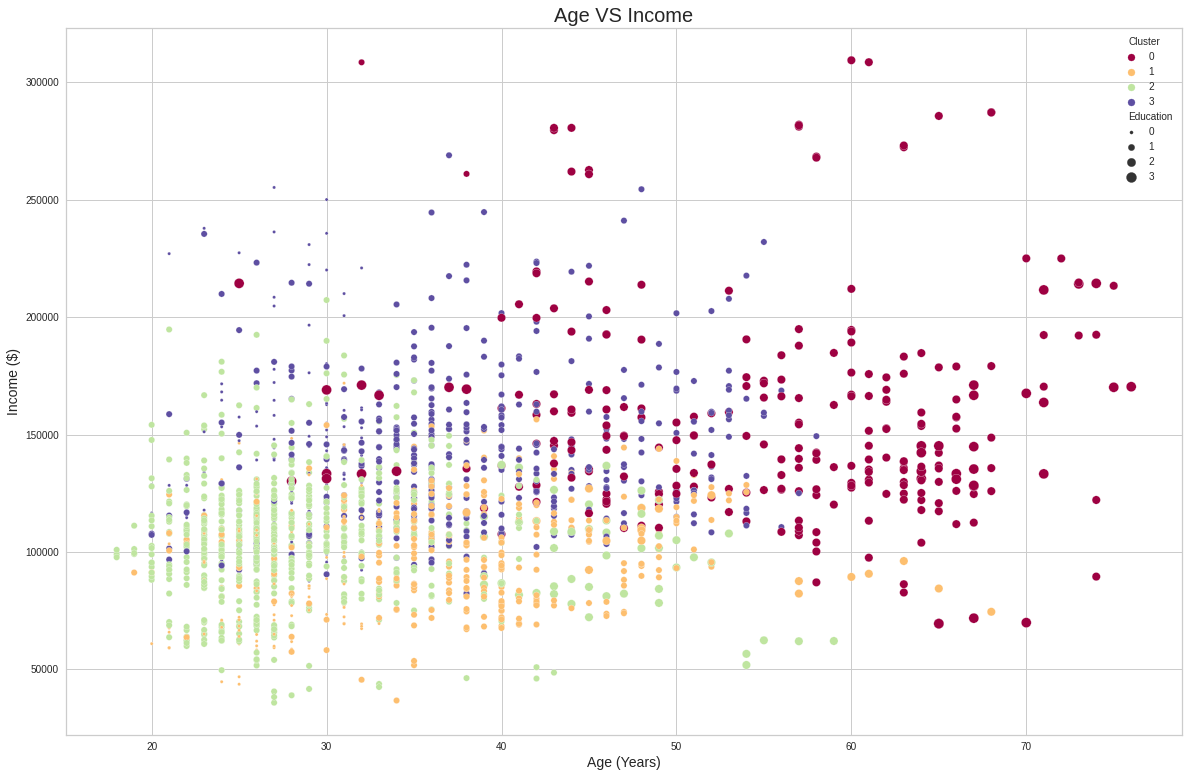

In [27]:
plt.figure(figsize=(20,13))
sns.scatterplot(x=df_kmeans['Age'], y=df_kmeans['Income'], hue=df_kmeans['Cluster'], size = df_kmeans['Education'], sizes = (10, 100), palette = 'Spectral')
plt.xlabel('Age (Years)', fontsize = 14)
plt.ylabel('Income ($)', fontsize = 14)
plt.title('Age VS Income', fontsize = 20)
plt.show()

MinMaxScaler

In [28]:
kmeans_mms = KMeans(n_clusters = 6, init = 'k-means++')
y_kmeans_mms = kmeans_mms.fit_predict(df_mms_kmeans)
labels_k_mms = kmeans_mms.labels_
df_kmeans_mms["Cluster"] = labels_k_mms
df_kmeans_mms.head(5)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,0,0,67,2,124670,1,2,1
1,1,1,22,1,150773,1,2,4
2,0,0,49,1,89210,0,0,3
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1


Scatter plot of age vs income using MinMaxScaler

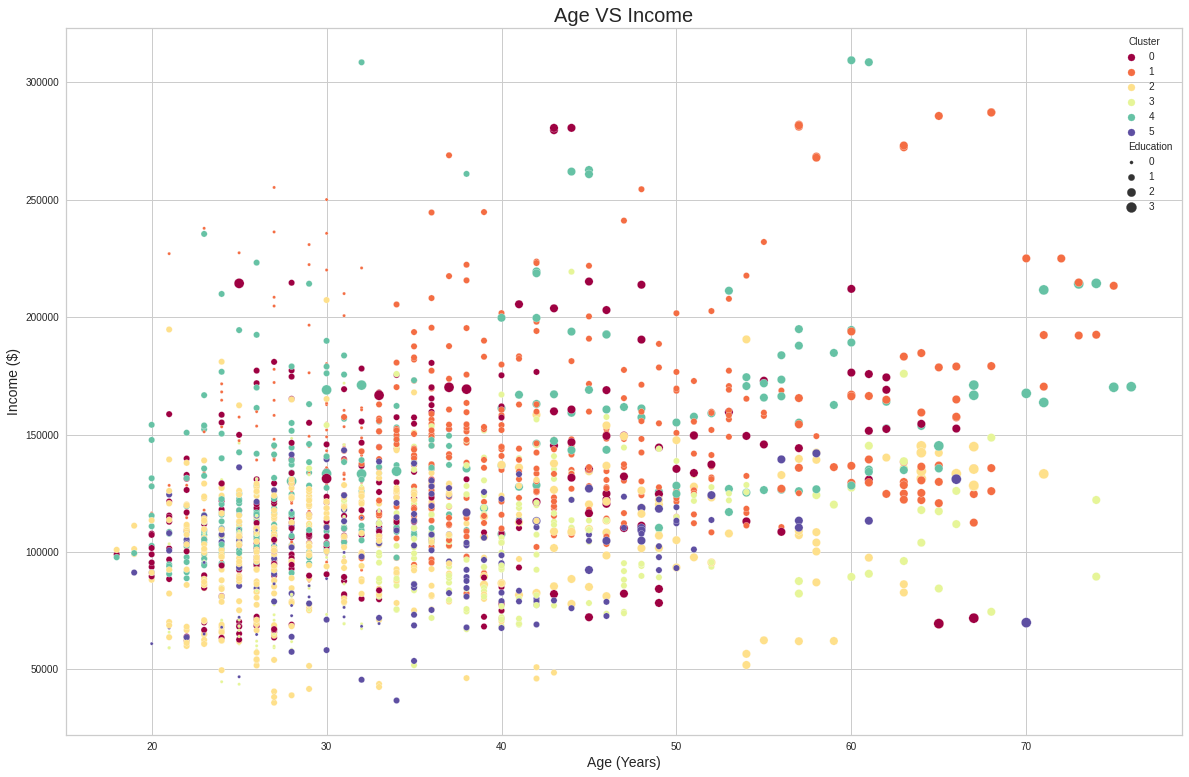

In [29]:
plt.figure(figsize=(20,13))
sns.scatterplot(x=df_kmeans_mms['Age'], y=df_kmeans_mms['Income'], hue=df_kmeans_mms['Cluster'], size = df_kmeans_mms['Education'], sizes = (10, 100), palette = 'Spectral')
plt.xlabel('Age (Years)', fontsize = 14)
plt.ylabel('Income ($)', fontsize = 14)
plt.title('Age VS Income', fontsize = 20)
plt.show()

Robust Scaler

In [30]:
kmeans_rs = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans_rs = kmeans_rs.fit_predict(df_rs_kmeans)
labels_k_rs = kmeans_rs.labels_
df_kmeans_rs["Cluster"] = labels_k_rs
df_kmeans_rs.head(5)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,0,0,67,2,124670,1,2,1
1,1,1,22,1,150773,1,2,1
2,0,0,49,1,89210,0,0,0
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1


Scatter plot with Robust Scaler

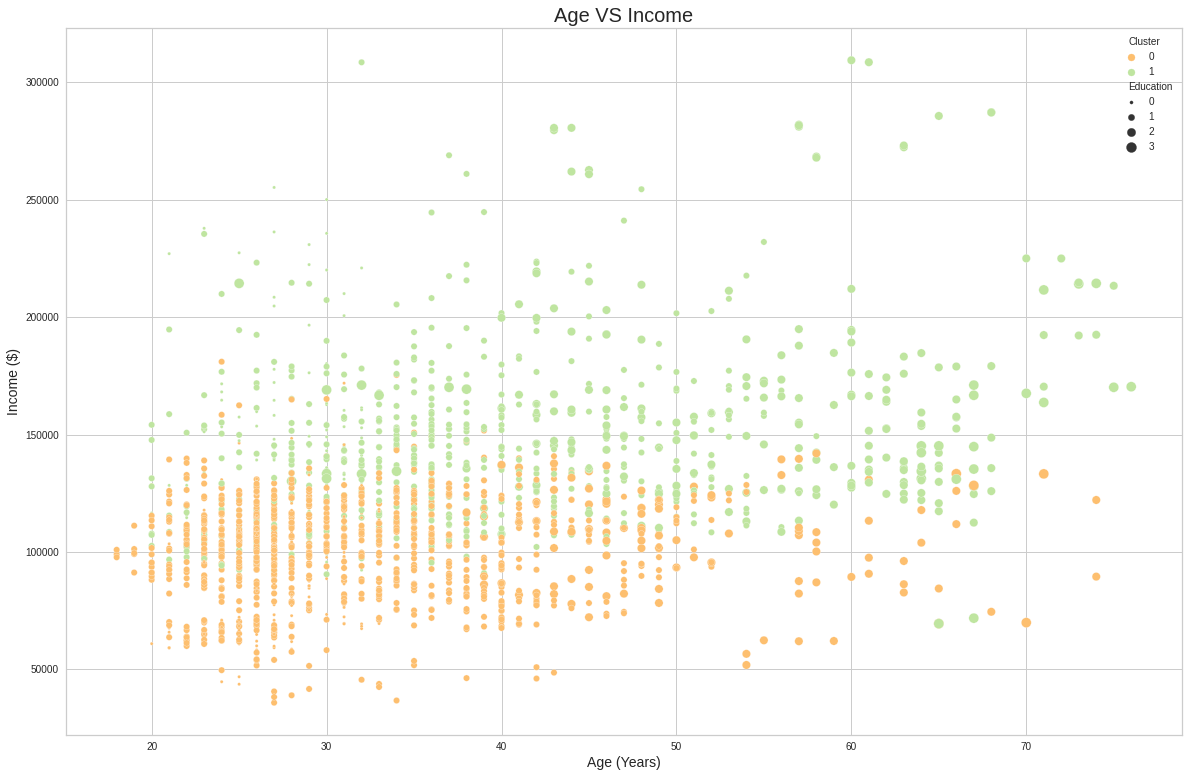

In [31]:
plt.figure(figsize=(20,13))
sns.scatterplot(x=df_kmeans_rs['Age'], y=df_kmeans_rs['Income'], hue=df_kmeans_rs['Cluster'], size = df_kmeans_rs['Education'], sizes = (10, 100), palette = 'Spectral')
plt.xlabel('Age (Years)', fontsize = 14)
plt.ylabel('Income ($)', fontsize = 14)
plt.title('Age VS Income', fontsize = 20)
plt.show()

Final Thoughts: Standard Scaler seemed to work the best with the data. Robust scaler did best with 2 clusters, while MinMaxScaler did best with 6 clusters. Two clusters did not seem to have enough seperation in clusters for customer groups, as having only 2 would not allow us to really narrow our focus group. On the other hand, 7 was a lot of clusters and did not have great seperation, making it hard to find the focus group of customers. StandardScaler did well with the number of clusters and seperation.

# Checking PCA cluster for each scaler for K-Means

PCA for standard scaler

In [32]:
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled[SELECTED_FEATURES])
pca_df = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])
pca_df["Cluster"] = y_kmeans + 1

fig = px.scatter(pca_df, x="x1", y="x2", color='Cluster', width=800, height=800)
fig.show()

PCA for MinMax Scaler

In [33]:
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled_mms[SELECTED_FEATURES])
pca_df = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])
pca_df["Cluster"] = y_kmeans_mms + 1

fig = px.scatter(pca_df, x="x1", y="x2", color='Cluster', width=800, height=800)
fig.show()

PCA for Robust Scaler

In [34]:
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled_rs[SELECTED_FEATURES])
pca_df = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])
pca_df["Cluster"] = y_kmeans_rs + 1

fig = px.scatter(pca_df, x="x1", y="x2", color='Cluster', width=800, height=800)
fig.show()

# Hierarchical Clustering

Creating Dendrogram

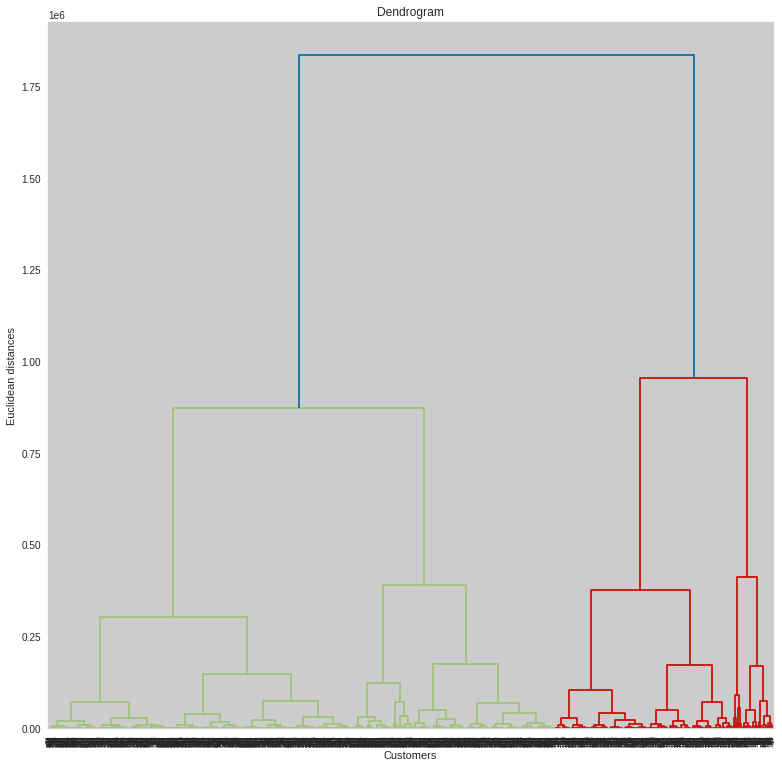

In [35]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,13))
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Note: Using dendrogram will have 2 clusters

Applying AgglomerativeClustering and adding cluster labels to df

In [36]:
from sklearn.cluster import AgglomerativeClustering
df_agg_cluster = df
df_std_agg_cluster = StandardScaler().fit_transform(df_agg_cluster)
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df_std_agg_cluster)
labels_ac = cluster.labels_
df_agg_cluster["Cluster"] = labels_ac
df_agg_cluster.head(5)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,1
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,0
4,0,0,53,1,149031,1,1,0


Scatter Plot of Age vs Income using Agglomerative Clustering

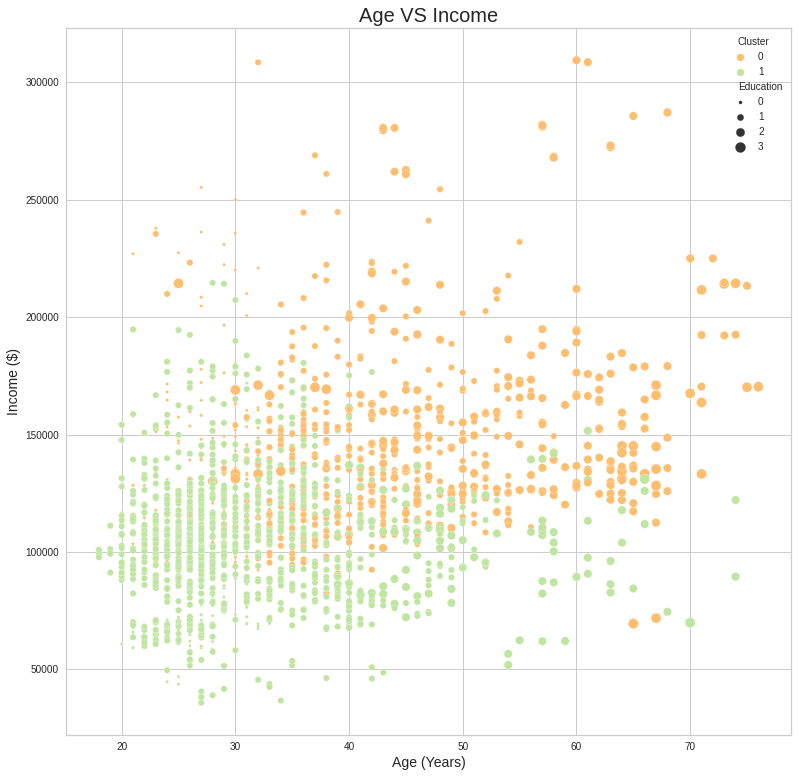

In [37]:
plt.figure(figsize=(13,13))
sns.scatterplot(x=df_agg_cluster['Age'], y=df_agg_cluster['Income'], hue=df_agg_cluster["Cluster"], size = df_kmeans['Education'], sizes = (10, 100), palette = 'Spectral')
plt.xlabel('Age (Years)', fontsize = 14)
plt.ylabel('Income ($)', fontsize = 14)
plt.title('Age VS Income', fontsize = 20)
plt.show()

# DBSCAN

In [38]:
from sklearn.neighbors import NearestNeighbors
nn_model = NearestNeighbors(n_neighbors=2)
df_dbscan = df
df_std_dbscan = StandardScaler().fit_transform(df_dbscan) 
nn_model.fit(df_std_dbscan)
distances, indices = nn_model.kneighbors(df_std_dbscan)

Finding Epsilon and min_sample Values

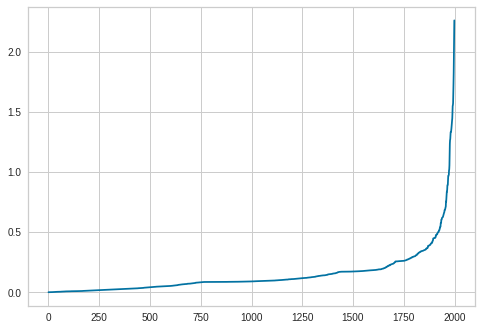

In [39]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

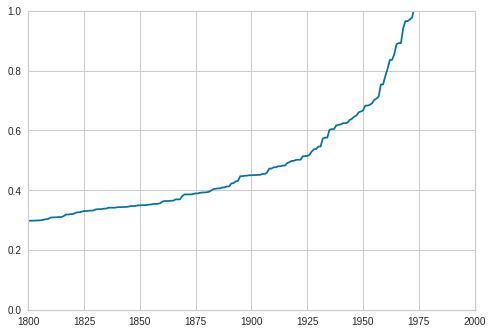

In [40]:
plt.xlim([1800, 2000])
plt.ylim([0, 1])
plt.plot(distances)

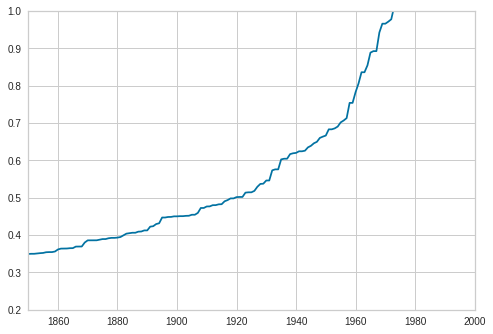

In [41]:
plt.xlim([1850, 2000])
plt.ylim([0.2, 1])
plt.plot(distances)

Notes: epsilon around 0.6

7 dimensions for dataset so min_samples should b 7*2 = 14

Create clustering and add labels to df

In [42]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.6, min_samples = 14) 
dbscan.fit_predict(df_std_dbscan)
labels_db = dbscan.labels_
df_dbscan["Cluster"] = labels_db
df_dbscan.head(5)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,0,0,67,2,124670,1,2,-1
1,1,1,22,1,150773,1,2,3
2,0,0,49,1,89210,0,0,0
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1


Printing number of clusters and noise points

In [43]:
n_clusters_ = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise_ = list(labels_db).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 22
Estimated number of noise points: 523


Scatter Plot of Age VS Income using DB Scan

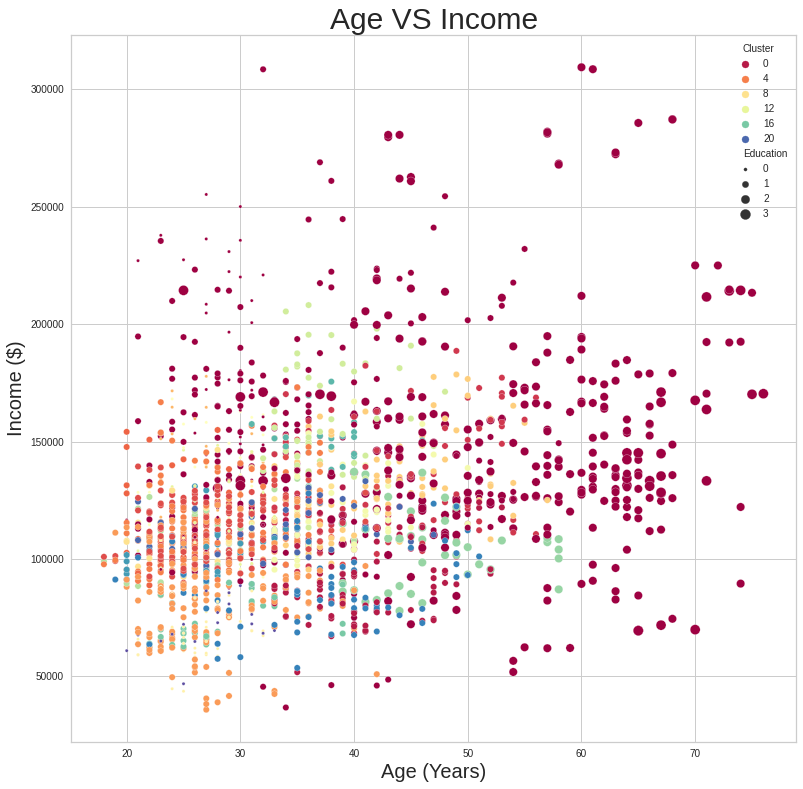

In [44]:
plt.figure(figsize=(13,13))
sns.scatterplot(x=df_dbscan['Age'], y=df_dbscan['Income'], hue = df_dbscan["Cluster"], size = df_dbscan['Education'], sizes = (10, 100), palette = 'Spectral')
plt.xlabel('Age (Years)', fontsize = 20)
plt.ylabel('Income ($)', fontsize = 20)
plt.title('Age VS Income', fontsize = 30)
plt.show()

# Separate rows by cluster number for K-Means Standard Scaler for Analysis

In [45]:
clust_0 = df_kmeans.loc[df_kmeans["Cluster"]==0]
clust_1 = df_kmeans.loc[df_kmeans["Cluster"]==1]
clust_2 = df_kmeans.loc[df_kmeans["Cluster"]==2]
clust_3 = df_kmeans.loc[df_kmeans["Cluster"]==3]

In [46]:
clust_0.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.0
mean,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,0.0
std,0.500950,0.462540,10.502066,0.358136,46204.670732,0.652665,0.771145,0.0
min,0.000000,0.000000,25.000000,1.000000,69487.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,47.000000,2.000000,128307.000000,1.000000,1.000000,0.0
50%,1.000000,1.000000,57.000000,2.000000,146716.000000,1.000000,1.000000,0.0
75%,1.000000,1.000000,64.000000,2.000000,172774.000000,2.000000,2.000000,0.0
max,1.000000,1.000000,76.000000,3.000000,309364.000000,2.000000,2.000000,0.0


Notes: 263 people in cluster

About half are men and half are women

Most people are not single, but a noteable amount of single people

Decent age range

Education is high school, university, or graduate, most being university

large income range

all levels of occupation with most being skilled or management

All settlement ranges with most being medium or large


In [47]:
clust_1.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.00000,462.0
mean,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.04329,1.0
std,0.478363,0.138356,8.749180,0.517314,22950.837099,0.470361,0.20373,0.0
min,0.000000,0.000000,19.000000,0.000000,36760.000000,0.000000,0.00000,1.0
25%,0.000000,0.000000,28.000000,0.000000,79145.250000,0.000000,0.00000,1.0
50%,0.000000,0.000000,35.000000,1.000000,99102.000000,0.000000,0.00000,1.0
75%,1.000000,0.000000,41.000000,1.000000,113594.500000,1.000000,0.00000,1.0
max,1.000000,1.000000,68.000000,2.000000,171857.000000,1.000000,1.00000,1.0


Notes: 462 people in cluster

Most are male, with a noteable amount as female

Almost all the people are single, with only a few not single

Decent age range

Education is either unknown, high school, or university, with most being unknown or high shcool

large income range

All occupation is either umemployed/no-skill or skilled with most being umemployed/no-skill

Settlements are either small or medium, with most being medium


In [48]:
clust_2.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.0
mean,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,2.0
std,0.353456,0.053225,6.751582,0.252071,25370.288131,0.518935,0.652831,0.0
min,0.000000,0.000000,18.000000,1.000000,35832.000000,0.000000,0.000000,2.0
25%,1.000000,1.000000,24.000000,1.000000,92304.000000,0.000000,0.000000,2.0
50%,1.000000,1.000000,27.000000,1.000000,106577.000000,1.000000,0.000000,2.0
75%,1.000000,1.000000,32.000000,1.000000,120326.000000,1.000000,1.000000,2.0
max,1.000000,1.000000,59.000000,2.000000,207262.000000,2.000000,2.000000,2.0


Notes: 705 people in cluster

Almost all are female with only a few male

Almost all people are not single, with very little being single

Age range still decent

Education is either high school or university, with most being high shcool

Large income range

All levels of occupation with most being unemployed/no-skill or skilled

all settlement sizes with most being small

In [49]:
clust_3.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.0
mean,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,3.0
std,0.170252,0.379170,8.501018,0.442605,33459.299686,0.486823,0.537199,0.0
min,0.000000,0.000000,20.000000,0.000000,82398.000000,0.000000,0.000000,3.0
25%,0.000000,0.000000,29.000000,0.000000,116895.750000,1.000000,1.000000,3.0
50%,0.000000,0.000000,35.000000,1.000000,135629.000000,1.000000,2.000000,3.0
75%,0.000000,0.000000,41.000000,1.000000,157468.000000,2.000000,2.000000,3.0
max,1.000000,1.000000,58.000000,1.000000,268906.000000,2.000000,2.000000,3.0


Notes:570 people in cluster

Almost all are male, with only a few female

Mostly single, with a few not single

Decent age range

Education either unknown or high school with most being high school

Still large income range

All levels of occumpation with most appearing to be skilled based on mean

All settlement sizes also with most appearing to be large based on mean

Final Thoughts:

K-means did the best at clustering due to the number of clusters it created (Not too few like hierarchical clustering, and not too many like DB Scan), but still not great seperation. Standard scaler seemed to be the best scaler to use for the same reason that K-means was the best clustering choice, but again, did not have great seperation of clusters, as clusters were not well defined/separated. Looking at notes above, it can be seen from some of the clusters as to how the data was grouped, but may need more data to get better clustering.

# Analyzing K-means Cluster (Standard Scaler)

Analyzing Clusters

Downloading Packages Needed

In [50]:
!pip install data-science-utils
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Cluster Cardinality and Magnitude

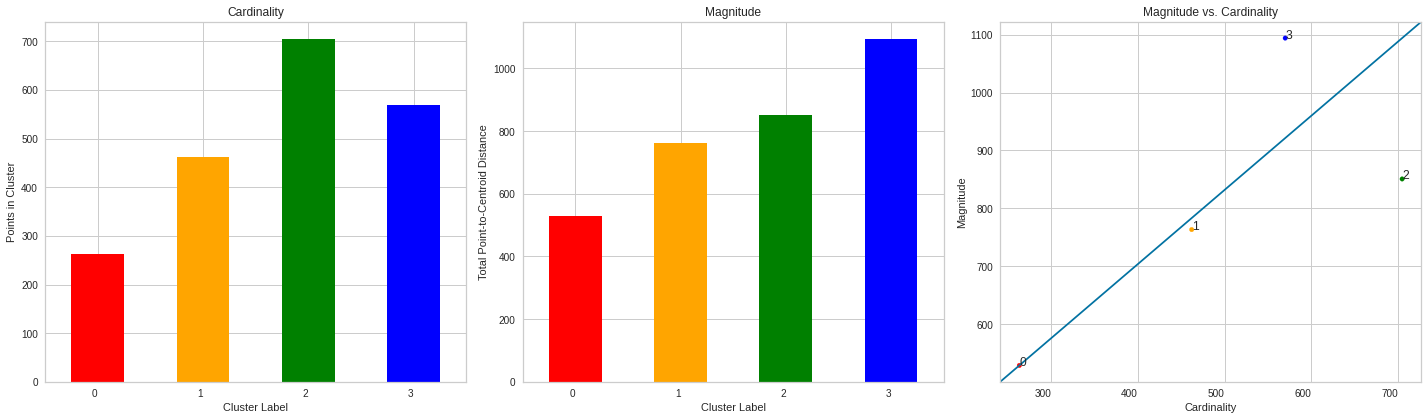

In [51]:
cluster_colors = ['Red', 'Orange', 'Green', 'Blue']
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,6))

plot_cluster_cardinality(labels_k,
                         ax=ax1,
                         title="Cardinality",
                         color=cluster_colors
                        )
plot_cluster_magnitude(df_rs_kmeans,
                        labels_k,
                        kmeans_ss.cluster_centers_,
                        euclidean,
                        ax=ax2,
                        title="Magnitude",
                        color=cluster_colors
                       )
plot_magnitude_vs_cardinality(df_rs_kmeans,
                               labels_k,
                               kmeans_ss.cluster_centers_,
                               euclidean,
                               color=cluster_colors[0:kmeans_ss.n_clusters],
                               ax=ax3, 
                               title="Magnitude vs. Cardinality"
                               )

fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

Notes:

From analyzing the cardinality, clusters ideally would be about the same size, but there is a large difference in the number of data points between cluster 0 and 2. 

For magnitude, the clusters appear to become more spread each cluster

For cardinality vs magnitude, it would appear as though cluster 0 and 1 would be 'normal' clusters, where cluster 2 and 3 are anomalous

Boxplot of feature distributions per cluster

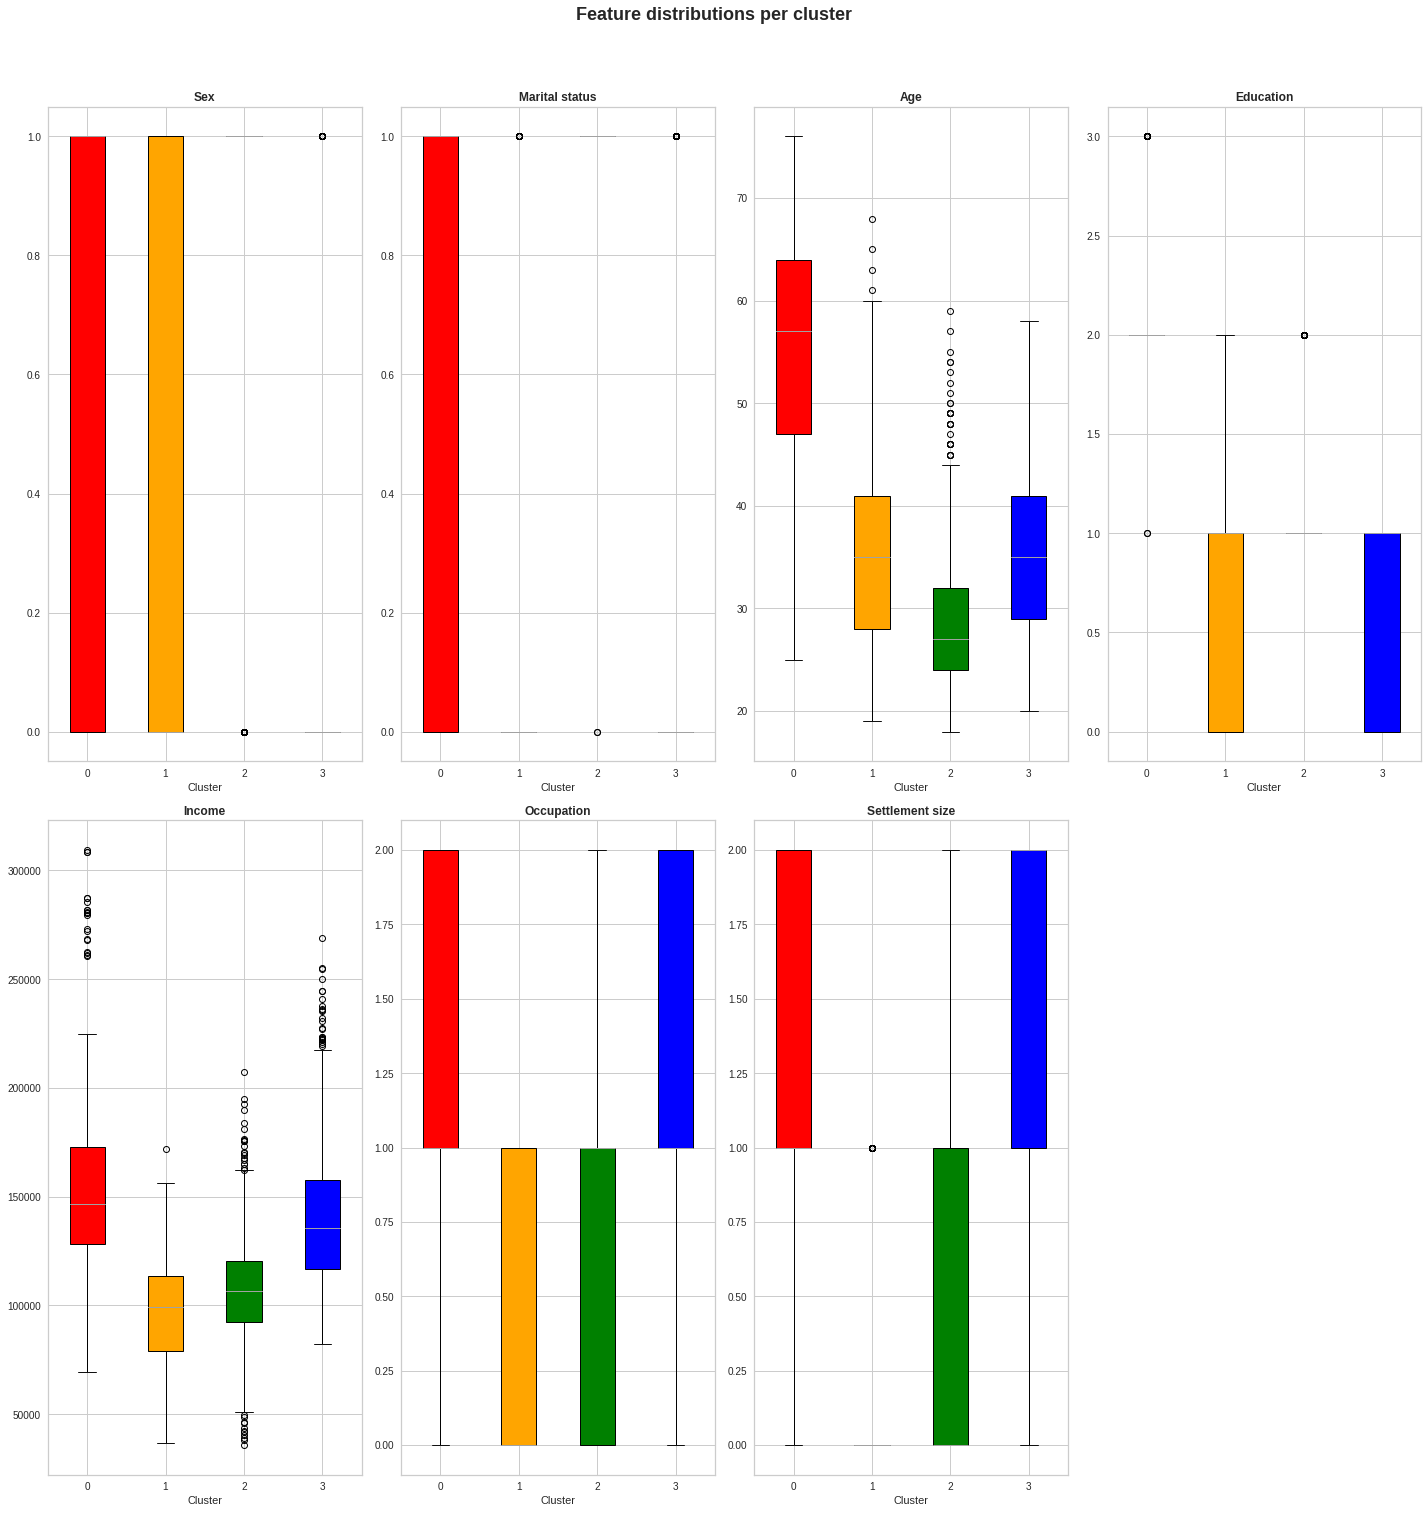

In [52]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
features = SELECTED_FEATURES
ncols = 4
nrows = len(features) // ncols + (len(features) % ncols > 0)
fig = plt.figure(figsize=(20,20))

for n, feature in enumerate(features):
    ax = plt.subplot(nrows, ncols, n + 1)
    box = df_kmeans[[feature, 'Cluster']].boxplot(by='Cluster',ax=ax, return_type='both', patch_artist = True)

    for row_key, (ax,row) in box.iteritems():
        ax.set_xlabel('Cluster')
        ax.set_title(feature,fontweight="bold")
        for i,box in enumerate(row['boxes']):
            box.set_facecolor(cluster_colors[i])

fig.suptitle('Feature distributions per cluster', fontsize=18, y=1.05, fontweight = 'bold')   
plt.tight_layout()
plt.show()

Notes: 

The boxplots give a visualization to the cluster notes that were made for each cluster. The clusters do not seem to capture income or age very well, as there are many outliers for each.